# LC 3 - 
- Nama : Gilbert Kurniawan Hariyanto
- Batch : RMT-026
- Program ini dibuat sebagai jobdesk Data Engineer untuk membantu divisi Finance dalam mengatur data transaksi mereka dan membuatkan database dengan PostgreSQL server

# P0 LC3 Exercise

- Bigquery project_id: **`bigquery-public-data`**
- Dataset: **`austin_bikeshare`**
- Tabel: **`bikeshare_trips`**
- Hanya ambil kolom **`duration_minutes`** saja
- Berikan LIMIT pada data yang diambil sebesar **3000** entry data

# Setup

In [7]:
from google.colab import auth
from google.cloud import bigquery
import scipy
import statistics
from scipy.stats import skew
from scipy.stats import kurtosis

import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.display import display, HTML

auth.authenticate_user()
print('Authenticated')

project_id = "ngc7-405813" #GUNAKAN GCP PROJECT-ID KALIAN MASING-MASING
client = bigquery.Client(project=project_id)

Authenticated


# Soal

## Statistic Descriptive

1. Lakukan measurement central tendency (mean, median, dan modus).
2. Cek skewness dan kurtosis.
3. Cari outlier dari sebaran data.
4. Berapa persentase outlier nya?
5. Hapus data outlier, kemudian bandingkan data sebelum dan sesudah penghapusan

## Sample Query

In [13]:
df = client.query('''
SELECT duration_sec
FROM `bigquery-public-data.san_francisco_bikeshare.bikeshare_trips`
LIMIT 3000
''').to_dataframe()

df.head()

# - Project_id: `bigquery-public-data`
# - Dataset: `san_francisco_bikeshare`
# - Table: `bikeshare_trips`
# - Ambil hanya kolom `duration_sec` saja
# - Berikan LIMIT pada data yang diambil sebesar 3000 entry data

,duration_sec
0,6079
1,5913
2,1055
3,272
4,318


# Statistic Descriptive

## 1. Lakukan measurement central tendency (mean, median, dan modus).

In [14]:
# code here
mean = df['duration_sec'].mean()
median = df['duration_sec'].median()
mode = df['duration_sec'].mode().values[0]

print("mean: ",mean)
print("median: ",median)
print("mode: ",mode)

mean:  872.6733333333333
median:  523.0
mode:  194


insight: Dari hasil measurement cetral tendency diatas, diketahui:


*   Mean = 872.6733333333333
* Median =  523.0
* Mode =  194


## 2. Cek skewness dan kurtosis.

In [5]:
# code here

print(f"Skewness: {df['duration_sec'].skew()}")
print(f"Kurtosis: {df['duration_sec'].kurtosis()}")


Skewness: 15.65049585570272
Kurtosis: 302.2266033186931


insight: Dari hasil skewness dan kurtosis diatas, diketahui:

* Skewness: 15.65049585570272
* Kurtosis: 302.266033186931

## 3. Cari outlier dari sebaran data.

<Axes: >

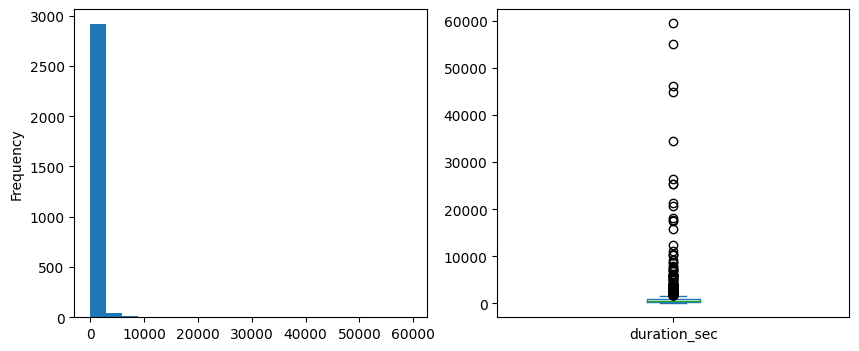

In [8]:
# code here
# z-score / turkey rule?

fig, ax = plt.subplots(ncols=2,figsize=(10,4))

df['duration_sec'].plot(kind='hist',bins=20,ax=ax[0])
df['duration_sec'].plot(kind='box',ax=ax[1])


In [9]:
# Z-SCORE: Used for normal distribution (skewness < |±0.5|)
# TURKEY RULE: Used for skewed distribution (skewness > |±0.5|)

# LEBIH DARI 0.5 - > TURKEY RULE

q1 = df['duration_sec'].quantile(0.25)
q3 = df['duration_sec'].quantile(0.75)
iqr = q3-q1

up_bound = q3 + 1.5*iqr
low_bound = q1 - 1.5*iqr

print(f'Upper Boundary: {up_bound:.2f}' )
print(f'Lower Boundary: {low_bound:.2f}')

Upper Boundary: 1685.50
Lower Boundary: -526.50


insight: Dari hasil koding diatas, diketahui:

* Didapati persebaran data yang membentuk skewed distribution dan banyak terdapat outlier bila dilihat dari histogram dan box plot
* Pengecekan skewed yang lebih dari 0.5 - > dikonfirmasi untuk mengecek batas atas dan bawah dan melihat data outlier yang melebihi batas tersebut

## 4. Berapa persentase outlier nya?

In [11]:
# code here
outlier = df['duration_sec'][(df['duration_sec']<low_bound) | (df['duration_sec']>up_bound)]
no_outlier = df['duration_sec'][(df['duration_sec']>=low_bound) & (df['duration_sec']<=up_bound)]

print(f'Percentage of outliers: {len(outlier)*100/len(df["duration_sec"]):.2f}%')


Percentage of outliers: 6.00%


Insight: dari pengecekan presentase diatas, didapati data yang kita gunakan memiliki outlier sebesar 6%.

## 5. Hapus data outlier, kemudian bandingkan data sebelum dan sesudah penghapusan

In [19]:
# perbandingan mean median modus
mean_after = no_outlier.mean()
median_after = no_outlier.median()
mode_after = no_outlier.mode().values[0]

print("mean_before: ",mean)
print("median_before: ",median)
print("mode_before: ",mode)
print("skewedness_before: ", df['duration_sec'].skew())

print("mean_after: ",mean_after)
print("median_after: ",median_after)
print("mode_after: ",mode_after)
print("skewedness_after: ", no_outlier.skew())



mean_before:  872.6733333333333
median_before:  523.0
mode_before:  194
skewedness_before:  15.65049585570272
mean_after:  577.8663120567376
median_after:  496.0
mode_after:  194
skewedness_after:  0.9475825319611878


<Axes: >

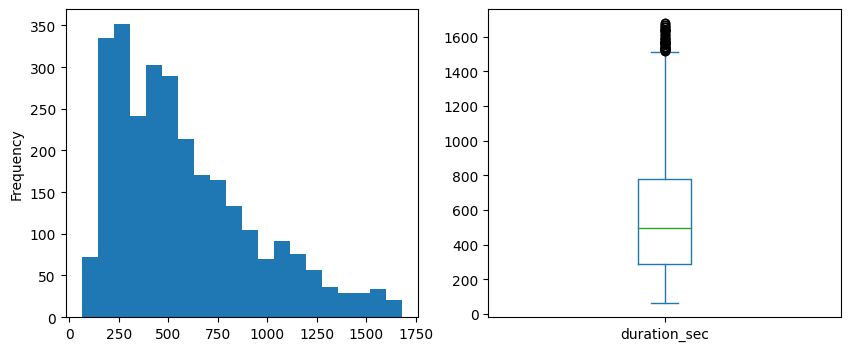

In [18]:
fig, ax = plt.subplots(ncols=2,figsize=(10,4))

no_outlier.plot(kind='hist',bins=20,ax=ax[0])
no_outlier.plot(kind='box',ax=ax[1])

Insight: dari hasil pembersihan dan analisis diatas, dapat dilihat:
* Perubahan pada mean, median, dan skewedness yang cukup signifikan
* Persebaran data yang berubah dilihat dari grafik histogram dan boxplot diatas

In [22]:
no_outlier.to_csv("result.csv", index = False)

# API

1. Buat URL untuk **menampilkan** seluruh data sesudah penghapusan outlier
2. Buat URL untuk **menambahkan** data

clue:
- Load data csv yang sudah diolah dengan pandas, kemudian konversi data ke dictionary `df.to_dict()` atau json `df.to_json()` untuk dapat diolah lebih lanjut dengan API menggunakan FastAPI.
- Pembuatan API dilakukan pada script `.py`
- Endpoint dan penamaan function pada API dibebaskan.

In [ ]:
# buat API di file .py